# Individual Giuded Project Week 5 AwP
### Adiru Valiant Ezabuku

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## For your Individual Guided Project, using the  same nyc-violations data, conduct an Exploratory Data Analysis on the dataset and produce a report in your Jupyter Notebook describing insights gleaned from the dataset.
## Please note that this EDA report must contain appropriate visualizations, to show trends and insights gleaned.

In [13]:
# Getting the data into the notebook

data = pd.read_csv("nyc-violation-ticket.csv")

#Converting the issue Date column to a datetime formart
data['Issue Date'] = pd.to_datetime(data['Issue Date'], format = 'mixed', dayfirst = True)
data.head(5)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,4714702166,KGK6659,NY,PAS,2020-11-12,36,4DSD,BMW,V,0,...,GY,NaN,2007,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
1,8793684599,L5232HY,TN,PAS,2020-09-14,21,TRAC,INTER,T,60790,...,WHITE,NaN,0,NaN,0,W,NaN,NaN,NaN,NaN
2,8864757053,BPMN76,FL,PAS,2020-11-25,20,SUBN,NISSA,T,36030,...,BLACK,NaN,0,NaN,0,49,20A-No Parking (Non-COM),NaN,NaN,NaN
3,8778326047,57387MJ,NY,COM,2020-08-20,38,VAN,NaN,T,34430,...,WH,NaN,2016,NaN,0,1,NaN,NaN,NaN,NaN
4,4706640702,M81KFJ,NJ,PAS,2020-09-09,36,UT,TOYOT,V,0,...,NaN,NaN,2002,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Summons Number                     50000 non-null  int64         
 1   Plate ID                           50000 non-null  object        
 2   Registration State                 50000 non-null  object        
 3   Plate Type                         50000 non-null  object        
 4   Issue Date                         50000 non-null  datetime64[ns]
 5   Violation Code                     50000 non-null  int64         
 6   Vehicle Body Type                  49855 non-null  object        
 7   Vehicle Make                       49864 non-null  object        
 8   Issuing Agency                     50000 non-null  object        
 9   Street Code1                       50000 non-null  int64         
 10  Street Code2                      

In [15]:
# QN 1 WHAT ARE THE MOST COMMON TYPES OF VIOLATIONS?

common_violations = data['Violation Description'].value_counts()
common_violations.head(5)

Violation Description
PHTO SCHOOL ZN SPEED VIOLATION    14422
FAILURE TO STOP AT RED LIGHT       1692
BUS LANE VIOLATION                 1435
21-No Parking (street clean)        814
38-Failure to Dsplay Meter Rec      707
Name: count, dtype: int64

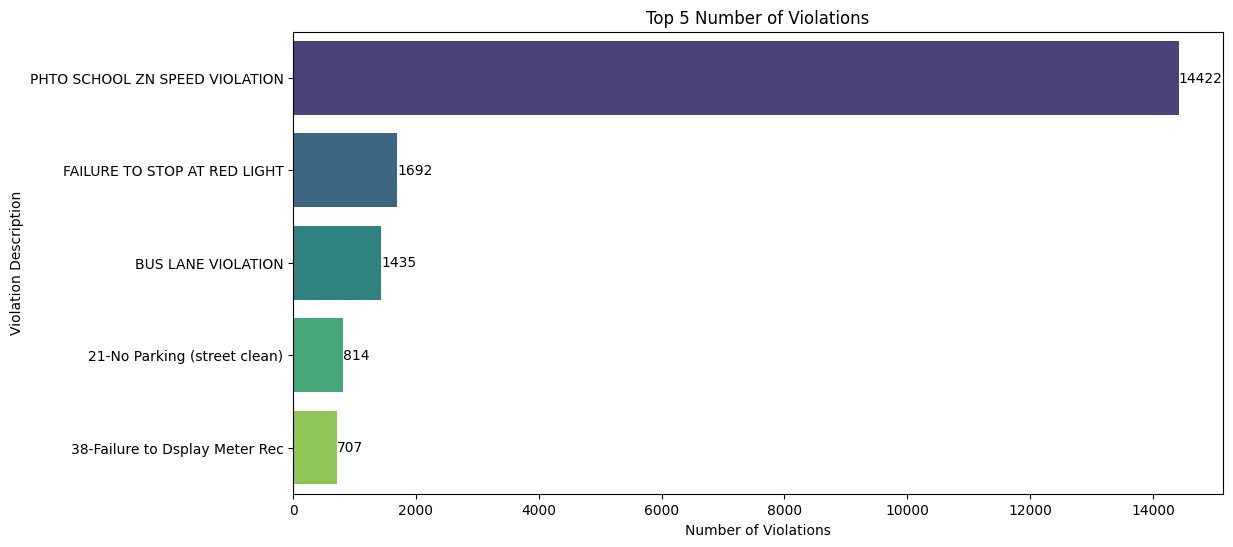

In [16]:
#VISUALIZATION OF THE TOP 5 MOST COMMON VIOLATIONS

violation_distribution = common_violations

#Creating a dataframe for number of violations
violation_df = pd.DataFrame(violation_distribution)
violation_df.rename(columns = {'count': 'Number of Violations'}, inplace = True)
violation_df

top_5_violations = violation_df.head(5)

# Plotting a bargraph
plt.figure(figsize=(12, 6))
map = sns.barplot(y='Violation Description', x='Number of Violations', data=top_5_violations, hue='Violation Description', palette='viridis')
for i in map.containers:
    map.bar_label(i,)

# Add labels and title
plt.ylabel('Violation Description')
plt.xlabel('Number of Violations')
plt.title('Top 5 Number of Violations')
plt.show()



## Observation
### The Data shows that the top 5 most common Violation Types are:
- PHTO SCHOOL ZN SPEED VIOLATION    14,422
- FAILURE TO STOP AT RED LIGHT       1,692
- BUS LANE VIOLATION                 1,435
- 21-No Parking (street clean)        814
- 8-Failure to Dsplay Meter Rec      707
### The highest violation being Phto School zn speed violation with 14,422 violations

In [17]:
# QN 2 ARE THERE ANY MISSING VALUES IN THE DATASET?

# Checking for missing values in the data
missing_values = data.isna().sum()

missing_values

Summons Number                           0
Plate ID                                 0
Registration State                       0
Plate Type                               0
Issue Date                               0
Violation Code                           0
Vehicle Body Type                      145
Vehicle Make                           136
Issuing Agency                           0
Street Code1                             0
Street Code2                             0
Street Code3                             0
Vehicle Expiration Date                  0
Violation Location                   17893
Violation Precinct                       0
Issuer Precinct                          0
Issuer Code                              0
Issuer Command                       17857
Issuer Squad                         17857
Violation Time                           1
Time First Observed                  48111
Violation County                       117
Violation In Front Of Or Opposite    18068
House Numbe

## Observations
### Yes, the data set has many missing values and as seen in the last three columns, all the values are missing

In [ ]:
# QN 3 HOW TO HANDLE MISSING VALUES IN THE DATASET?

data.dropna(inplace=True)
data.fillna()

## Observations
### I have chosen not to handle the missing values in the DataFtame because removing the missing values will significantly reduce the data set and may have alot of negative impact on our analysis

In [19]:
# QN 4 WHAT IS THE AVERAGE FINE AMOUNT FOR EACH VIOLATION TYPE?

# avg_fine_by_violation = data.groupby('Violation Type')['Fine Amount'].mean()

## Observations
### I was not able to answer this question since my data has no column for Fine amount neither does it have Values I could use to generate the Fine amount

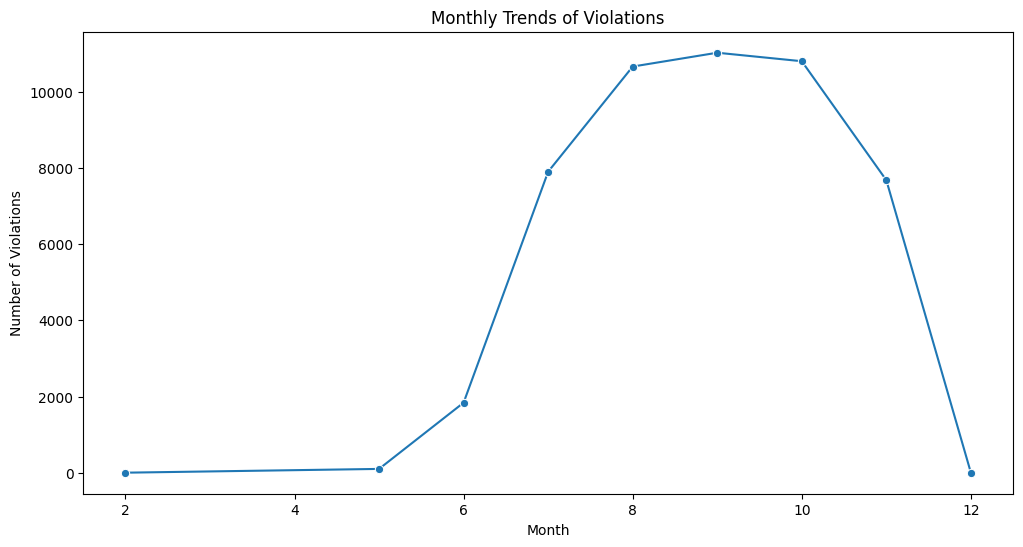

In [20]:
# QN 5 HOW HAVE VIOLATIONS CHANGED OVER TIME(e.g., MONTHLY OR YEARLY TRENDS)?

#PLOTTING THE MONTHLY CHANGE IN VIOLATIONS 

data['Month'] = data['Issue Date'].dt.month

# Group by 'Month' and count the number of violations
monthly_violations = data.groupby('Month').size().reset_index(name='Number of Violations')

# Plotting Monthly Trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Number of Violations', data=monthly_violations, marker='o')

plt.title('Monthly Trends of Violations')
plt.xlabel('Month')
plt.ylabel('Number of Violations')

plt.show()



## Observations for Monthly
### From our observations we see that the violations are lower in the first 4 months and then increase greatly in the following months and tend to decrease towards the last months

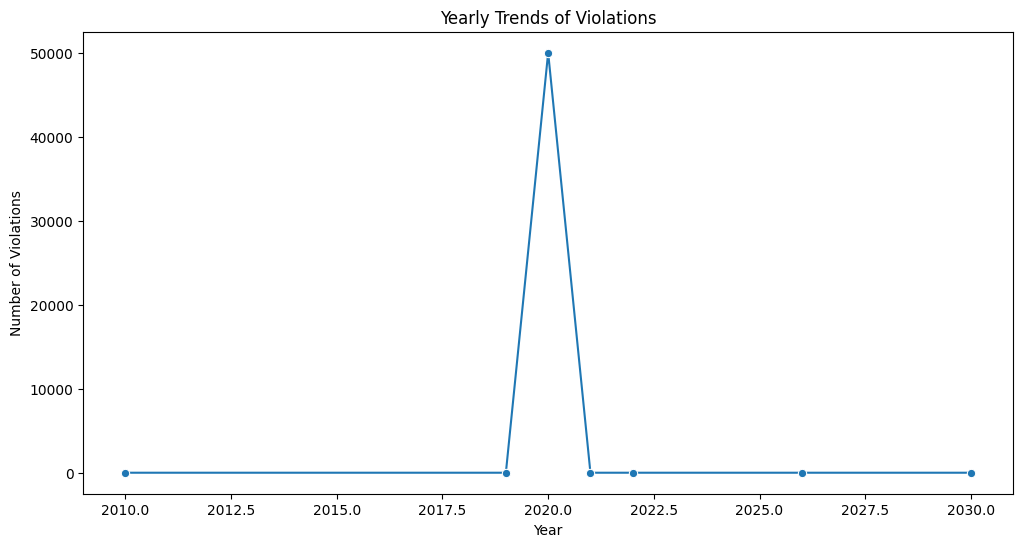

In [21]:
#PLOTTING THE YEARLY CHANGE IN VIOLATIONS 

data['Year'] = data['Issue Date'].dt.year

# Group by 'Year' and count the number of violations
yearly_violations = data.groupby('Year').size().reset_index(name='Number of Violations')

# Plotting Yearly Trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Number of Violations', data=yearly_violations, marker='o')

plt.title('Yearly Trends of Violations')
plt.xlabel('Year')
plt.ylabel('Number of Violations')

plt.show()


## Observations for Yearly 
### From our visuals it shows that violations were the highest in the year 2020 and they dropped significantly in the next subsequent years

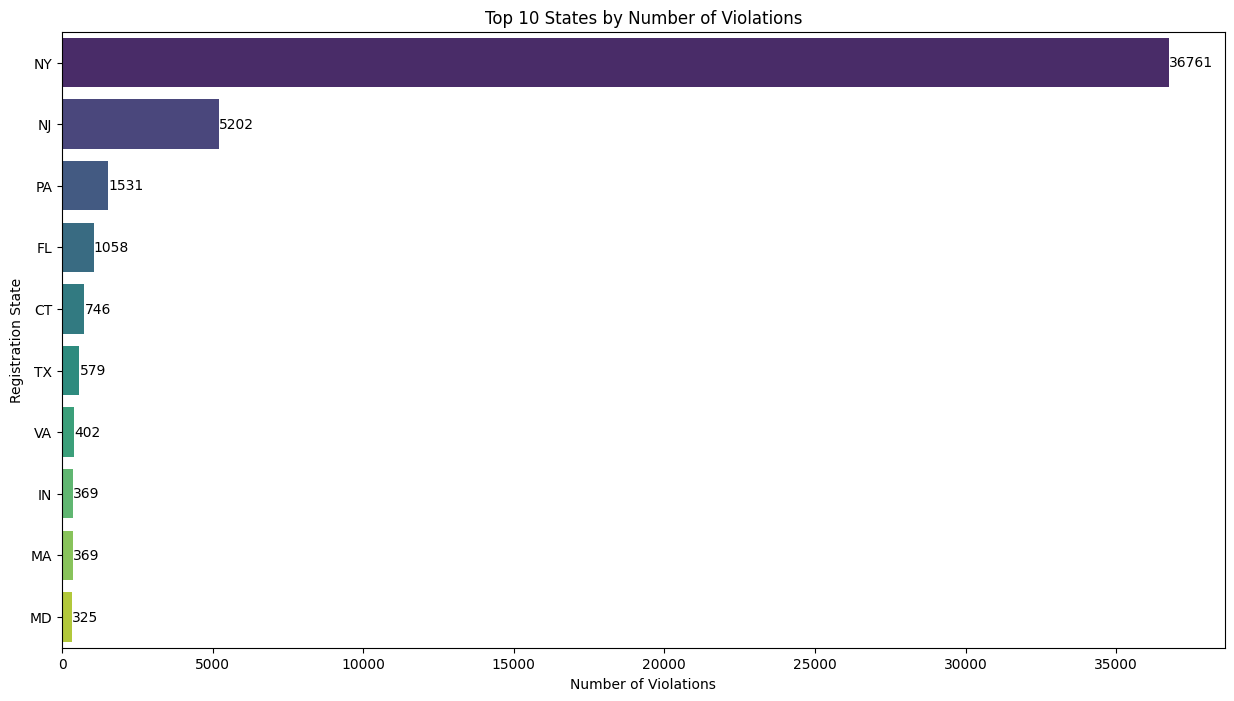

In [22]:
#QN 6. WHAT IS THE DISTRIBUTION OF VIOLATION FINES

# MODIFIED THIS QUESTION TO WHAT IS THE DISTRIBUTION OF VIOLATION PER STATE SINCE WE DONT HAVE VIOLATION FINES
# QN 6 WHAT IS THE DISTRIBUTION OF VIOLATION PER STATE

#Getting the number of violations per state
state_violation_distribution = data['Registration State'].value_counts() 

#Creating a dataframe for number of violations per state
new_df = pd.DataFrame(state_violation_distribution)
new_df.rename(columns = {'count': 'Number of Violations'}, inplace = True)
new_df

top_states = new_df.head(10)

#Plotting our bar graph
plt.figure(figsize=(15, 8))
map = sns.barplot(y = 'Registration State', x = 'Number of Violations', data = top_states, hue = 'Registration State', palette='viridis')
for i in map.containers:
    map.bar_label(i,)

plt.xlabel('Number of Violations')
plt.ylabel('Registration State')
plt.title('Top 10 States by Number of Violations')
plt.show()

## Observations
### From our observation Vehicles with Registration State as New York (NY) have the highest number of violations at 36,761